In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import json
import os

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

In [30]:
data_dir = "/data/ddmg/redditlanguagemodeling/results/mnist/user_weight_train_2_debug/42"

In [31]:
step_user_losses = np.load(os.path.join(data_dir, "step_user_losses.npy"))

In [32]:
num_steps, num_users = step_user_losses.shape

In [33]:
user_loss_df = pd.DataFrame(step_user_losses, columns=["user_{}".format(i) for i in range(step_user_losses.shape[1])])

In [34]:
# validation loss per user for each outer loop step
user_loss_df["step"] = np.arange(len(user_loss_df))
user_loss_df

,user_0,user_1,user_2,step
0,0.258819,0.553757,0.529313,0
1,0.183722,0.439229,0.424995,1
2,0.256610,0.483210,0.395253,2
3,0.190099,0.406372,0.359137,3
4,0.169977,0.347518,0.502871,4
...,...,...,...,...
95,0.000281,0.000886,0.012569,95
96,0.005761,0.000465,0.032802,96
97,0.000265,0.000122,0.028355,97
98,0.002819,0.002083,0.035549,98


In [35]:
# flatten so there is a user ID column
losses_flat = step_user_losses.flatten(order='F')
users = np.array([["user_{}".format(i)] * num_steps for i in range(num_users)]).flatten()

In [36]:
steps = np.array([[np.arange(num_steps)] * num_users]).flatten()

<AxesSubplot:>

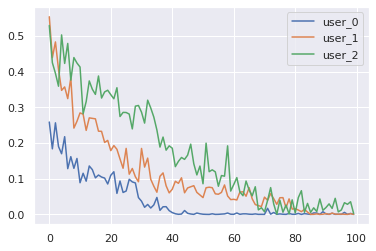

In [37]:
# eval loss at each step per user
sns.lineplot(x=steps, y=losses_flat, hue=users)

In [38]:
# compare to eval losses we're getting --> should be same as the eval losses we get the next 
# step for each user
# we also don't need to do the evaluation step because we already have val performance!!
with open(os.path.join(data_dir, "trainer_state.json"), 'rb') as f:
    trainer_state = json.load(f)

In [39]:
trainer_state['log_history']

[{'eval_loss': 0.44729629158973694, 'step': 0},
 {'eval_loss': 0.3493150621652603, 'step': 1},
 {'eval_loss': 0.3783576190471649, 'step': 2},
 {'eval_loss': 0.31853583455085754, 'step': 3},
 {'eval_loss': 0.3401217957337697, 'step': 4},
 {'eval_loss': 0.3326428731282552, 'step': 5},
 {'eval_loss': 0.31053873896598816, 'step': 6},
 {'eval_loss': 0.3068036586046219, 'step': 7},
 {'eval_loss': 0.2701228012641271, 'step': 8},
 {'eval_loss': 0.28056421379248303, 'step': 9},
 {'eval_loss': 0.2620076636473338, 'step': 10},
 {'eval_loss': 0.2260014389952024, 'step': 11},
 {'eval_loss': 0.2149187351266543, 'step': 12},
 {'eval_loss': 0.2600323011477788, 'step': 13},
 {'eval_loss': 0.24844548106193542, 'step': 14},
 {'eval_loss': 0.23550241937239966, 'step': 15},
 {'eval_loss': 0.24377917995055517, 'step': 16},
 {'eval_loss': 0.22115628172953924, 'step': 17},
 {'eval_loss': 0.21551080544789633, 'step': 18},
 {'eval_loss': 0.213522640367349, 'step': 19},
 {'eval_loss': 0.20794888337453207, 'step'

In [45]:
W = np.load(os.path.join(data_dir, "user_weight_matrix.npy"))

In [48]:
W

array([[ 0.9291242 ,  0.30823928, -0.10176469],
       [ 0.3250343 ,  0.5185319 , -0.04552258],
       [-0.14738068, -0.11972266,  1.0268005 ]], dtype=float32)

In [52]:
W_norm = W.copy()

In [53]:
W_norm[W_norm < 0] = 0
W_norm

array([[0.9291242 , 0.30823928, 0.        ],
       [0.3250343 , 0.5185319 , 0.        ],
       [0.        , 0.        , 1.0268005 ]], dtype=float32)

In [54]:
W_norm /= np.max(W_norm, axis=1)[:, None]

In [55]:
W_norm

array([[1.        , 0.3317525 , 0.        ],
       [0.62683564, 1.        , 0.        ],
       [0.        , 0.        , 1.        ]], dtype=float32)